In [1]:
from google.colab import files
uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


ABHISHEK J :24BAD002
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Linear Regression Results
MSE : 207.05407001047286
RMSE: 14.389373510006363
R²  : 0.03411211351611809

Feature Importance:
              

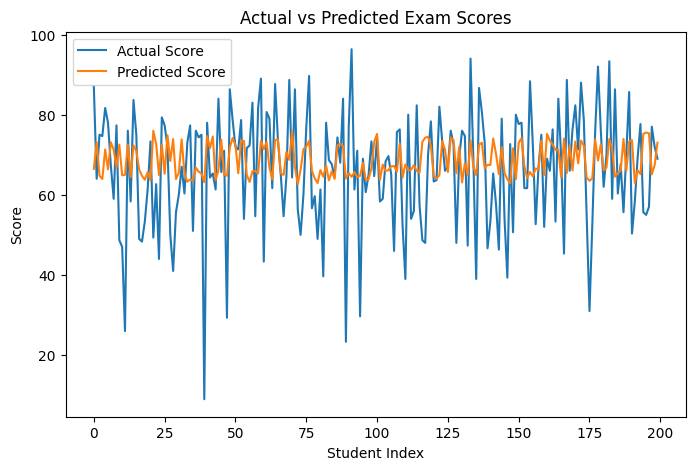

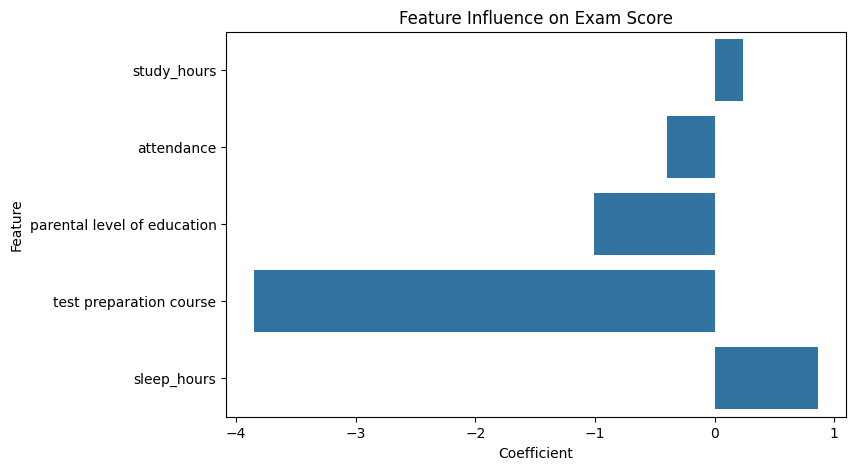

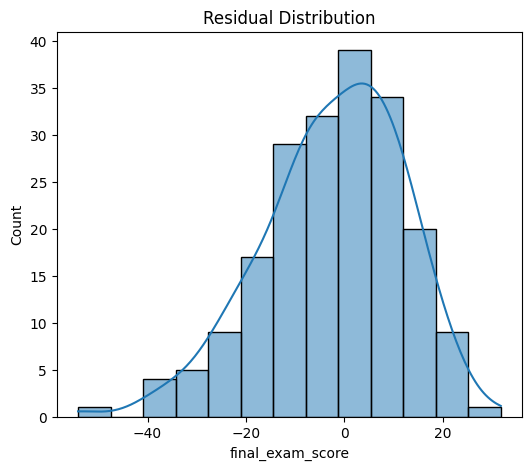

In [2]:
print("ABHISHEK J :24BAD002")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("StudentsPerformance.csv")
print(df.head())
le = LabelEncoder()
df['parental level of education'] = le.fit_transform(
df['parental level of education']
)
df['test preparation course'] = le.fit_transform(
df['test preparation course']
)
df['final_exam_score'] = (
df['math score'] +
df['reading score'] +
df['writing score']
) / 3
np.random.seed(42)
df['study_hours'] = np.random.randint(1, 6, size=len(df))
df['attendance'] = np.random.randint(60, 100, size=len(df))
df['sleep_hours'] = np.random.randint(5, 9, size=len(df))
df.fillna(df.mean(numeric_only=True), inplace=True)
X = df[
[
'study_hours',
'attendance',
'parental level of education',
'test preparation course',
'sleep_hours'
]
]
y = df['final_exam_score']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
X_scaled, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("\nLinear Regression Results")
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)
coefficients = pd.DataFrame({
'Feature': X.columns,
'Coefficient': model.coef_
})
print("\nFeature Importance:")
print(coefficients.sort_values(by='Coefficient', key=abs, ascending=False))
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print("\nRidge R²:", r2_score(y_test, ridge_pred))
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print("Lasso R²:", r2_score(y_test, lasso_pred))
y_test_line = y_test.reset_index(drop=True)
y_pred_line = pd.Series(y_pred)
plt.figure(figsize=(8,5))
plt.plot(y_test_line, label="Actual Score")
plt.plot(y_pred_line, label="Predicted Score")
plt.xlabel("Student Index")
plt.ylabel("Score")
plt.title("Actual vs Predicted Exam Scores")
plt.legend()
plt.show()
plt.figure(figsize=(8,5))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title("Feature Influence on Exam Score")
plt.show()
residuals = y_test - y_pred
plt.figure(figsize=(6,5))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()